In [1]:
import os
import av
import pathlib
import numpy as np
import torch
import argparse
from torch.utils.data import DataLoader
from transformers import AutoImageProcessor, AutoTokenizer, VisionEncoderDecoderModel
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW
from datasets import load_dataset
from datasets import Dataset
device = "cuda" if torch.cuda.is_available() else "cpu"

/home/907308160/code/nairr/.conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# NPZ Files

In [ ]:
npz_file = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/test/FldgzyEOSH8_373115_380731.npz'
npz_data = np.load(npz_file)
npz_data.files

IsADirectoryError: [Errno 21] Is a directory: '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/test'

In [33]:
processed_images = torch.from_numpy(data['arr_0']) 
print(type(processed_images), processed_images.shape)

<class 'torch.Tensor'> torch.Size([8, 3, 224, 224])


In [34]:
processed_captions = torch.from_numpy(data['arr_1'])
print(type(processed_captions), processed_captions.shape)

<class 'torch.Tensor'> torch.Size([1, 1024])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8, 3, 224, 224)
(3, 224, 224)
(224, 224, 3)


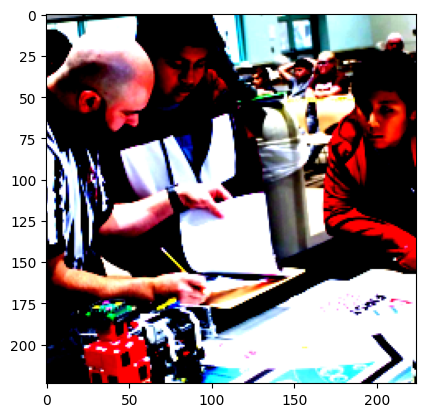

In [70]:
import matplotlib.pyplot as plt

np_images = processed_images.detach().numpy()
an_image = np_images[4]
print(np_images.shape)
print(an_image.shape)

# Transpose channels last to give to imshow
first_image_channel_last = np.transpose(an_image, (1, 2, 0))
print(first_image_channel_last.shape)
plt.imshow(first_image_channel_last)
plt.show()

# NPZ Dataloader with batching

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class NPZDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.file_names = os.listdir(data_dir)

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.file_names[idx])
        data = np.load(file_path)
        # Assuming each .npz file contains 'data' and 'label'
        sample = {'filenames': file_path, 'pixel_values': torch.from_numpy(data['arr_0']), 'labels': torch.from_numpy(data['arr_1'])}
        return sample

: 

In [ ]:
data_dir = '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/val'
dataset = NPZDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
for batch in dataloader:
    filenames, images, captions = batch['filenames'], batch['pixel_values'], batch['labels']
    # Train your model here
    print(filenames, images.shape, captions.shape)

    import sys
    sys.exit

['/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/4IncKbbQRh4_22796_26124.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/GTRxJmj1Wfs_361_4201.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/UCuhC9jTFMM_112221_121437.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/PnUGWl7K4x0_10410_29080.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/lyoaLway15g_56863_61043.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/2gWPP3kQiqI_1000_10216.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/SQBGJr8THGk_4414_11324.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/KIZProYn7R4_551651_560382.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/HyAmqy8F8WE_523968_526270.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/usTc08X1b4I_26602_37439.npz', '/data2/juve/dataset/youdescribe/npz_datasets/YD3_8_frames/4EEn9qILaeU_164852_173727.npz', '/data2/juve/data

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 for batch in dataloader:                                                                     │
│   2 │   filenames, images, captions = batch['filenames'], batch['images'], batch['captions']     │
│   3 │   # Train your model here                                                                  │
│   4 │   print(filenames, images.shape, captions.shape)                                           │
│                                                                                                  │
│ /home/907308160/anaconda3/envs/lavis/lib/python3.8/site-packages/torch/utils/data/dataloader.py: │
│ 634 in __next__                                                                                  │
│                                                                                                  │
│    631 │   │   │   if self._sampler_iter is None:                                                │
│    632 │   │   │   │   # TODO(https://github.com/pytorch/pytorch/issues/76750)                   │
│    633 │   │   │   │   self._reset()  # type: ignore[call-arg]                                   │
│ ❱  634 │   │   │   data = self._next_data()                                                      │
│    635 │   │   │   self._num_yielded += 1                                                        │
│    636 │   │   │   if self._dataset_kind == _DatasetKind.Iterable and \                          │
│    637 │   │   │   │   │   self._IterableDataset_len_called is not None and \                    │
│                                                                                                  │
│ /home/907308160/anaconda3/envs/lavis/lib/python3.8/site-packages/torch/utils/data/dataloader.py: │
│ 678 in _next_data                                                                                │
│                                                                                                  │
│    675 │                                                                                         │
│    676 │   def _next_data(self):                                                                 │
│    677 │   │   index = self._next_index()  # may raise StopIteration                             │
│ ❱  678 │   │   data = self._dataset_fetcher.fetch(index)  # may raise StopIteration              │
│    679 │   │   if self._pin_memory:                                                              │
│    680 │   │   │   data = _utils.pin_memory.pin_memory(data, self._pin_memory_device)            │
│    681 │   │   return data                                                                       │
│                                                                                                  │
│ /home/907308160/anaconda3/envs/lavis/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.p │
│ y:51 in fetch                                                                                    │
│                                                                                                  │
│   48 │   │   │   if hasattr(self.dataset, "__getitems__") and self.dataset.__getitems__:         │
│   49 │   │   │   │   data = self.dataset.__getitems__(possibly_batched_index)                    │
│   50 │   │   │   else:                                                                           │
│ ❱ 51 │   │   │   │   data = [self.dataset[idx] for idx in possibly_batched_index]                │
│   52 │   │   else:                                                                               │
│   53 │   │   │   data = self.dataset[possibly_batched_index]                                     │
│   54 │   │   return self.collate_fn(data)                  